<a href="https://colab.research.google.com/github/JollyRocketts/Stock-Price-Prediction/blob/main/StockPriceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

data_raw= pd.read_csv("stocks.csv", index_col="Date")

In [ ]:
def generate_features(df):
    df_new=pd.DataFrame()
    df_new['open']=df['Open']
    df_new['open_1']=df['Open'].shift(1)
    df_new['close_1']=df['Close'].shift(1)
    df_new['high_1']=df['High'].shift(1)
    df_new['low_1']=df['Low'].shift(1)
    df_new['volume_1']=df['Volume'].shift(1)
    # average price
    df_new['avg_price_5']= df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30']= df['Close'].rolling(21).mean().shift(1)
    df_new['avg_price_365']= df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30']= df_new['avg_price_5']/df_new['avg_price_30']
    df_new['ratio_avg_price_5_365']= df_new['avg_price_5']/df_new['avg_price_365']
    df_new['ratio_avg_price_30_365']= df_new['avg_price_30']/df_new['avg_price_365']
    # average volume
    df_new['avg_volume_5']= df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30']= df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365']= df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30']= df_new['avg_volume_5']/df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365']= df_new['avg_volume_5']/df_new['avg_volume_365']
    df_new['ratio_avg_volume30_365']= df_new['avg_volume_30']/df_new['avg_volume_365']
    #standard deviation of prices
    df_new['std_price_5']= df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30']= df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365']= df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30']= df_new['std_price_5']/df_new['std_price_30']
    df_new['ratio_std_price_5_365']= df_new['std_price_5']/df_new['std_price_365']
    df_new['ratio_std_price_30_365']= df_new['std_price_30']/df_new['std_price_365']
    # standard deviation of volume
    df_new['std_volume_5']= df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30']= df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365']= df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30']= df_new['std_volume_5']/df_new['std_volume_30']
    df_new['ratio_std_volume_5_365']= df_new['std_volume_5']/df_new['std_volume_365']
    df_new['ratio_std_volume_30_365']= df_new['std_volume_30']/df_new['std_volume_365']
    # the target
    df_new['close']=df['Close']
    df_new=df_new.dropna(axis=0)
    return df_new

data= generate_features(data_raw)

In [ ]:
start_train= "1988-01-01"
end_train="2015-12-31"

start_test="2016-01-01"
end_test="2016-12-31"

data_train=data[start_train:end_train]

X_train= data_train.drop('close',axis=1).values
y_train= data_train['close'].values

data_test= data[start_test:end_test]

X_test= data_test.drop('close',axis=1).values
y_test= data_test['close'].values

In [ ]:
scaler=StandardScaler()

X_scaled_train= scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

param_grid={
    "alpha":[1e-5,3e-5,1e-4],
    "eta0":[0.01,0.03,0.1]
}

from sklearn.linear_model import SGDRegressor

lr=SGDRegressor(penalty="l2", max_iter=100)
grid_search= GridSearchCV(lr, param_grid, cv=5, scoring="r2")
grid_search.fit(X_scaled_train, y_train)

In [ ]:
lr_best= grid_search.best_estimator_

predictions_lr= lr_best.predict(X_scaled_test)

In [ ]:
data_raw.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1988-01-04,1952.589966,2030.010010,1950.760010,2015.250000,2015.250000,20880000
1988-01-05,2056.370117,2075.270020,2021.390015,2031.500000,2031.500000,27200000
1988-01-06,2036.469971,2058.189941,2012.770020,2037.800049,2037.800049,18800000
1988-01-07,2019.890015,2061.510010,2004.640015,2051.889893,2051.889893,21370000
1988-01-08,2046.579956,2058.689941,1898.040039,1911.310059,1911.310059,27440000


In [ ]:
data_raw.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,19908.609375,19934.150391,19899.060547,19933.810547,19933.810547,158260000
2016-12-27,19943.460938,19980.240234,19939.800781,19945.039063,19945.039063,158540000
2016-12-28,19964.310547,19981.109375,19827.310547,19833.679688,19833.679688,188350000
2016-12-29,19835.460938,19878.439453,19788.939453,19819.779297,19819.779297,172040000
2016-12-30,19833.169922,19852.550781,19718.669922,19762.599609,19762.599609,271910000


Stock Price from  1988-01-04  to  2016-12-30  :


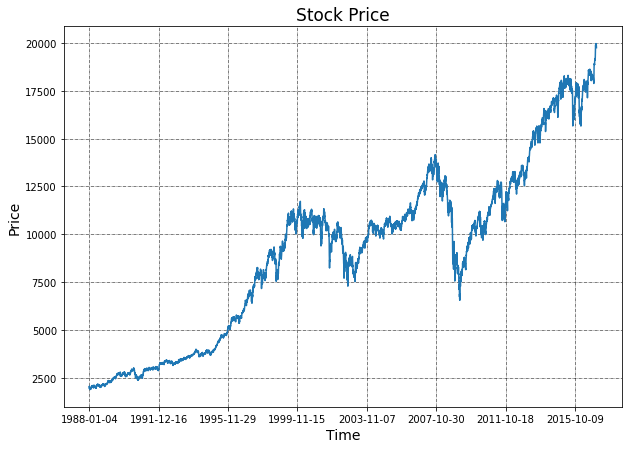

In [ ]:
print("Stock Price from ",data_raw.index[0]," to ",data_raw.index[-1]," :")
data_raw['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
data_raw.index

Index(['1988-01-04', '1988-01-05', '1988-01-06', '1988-01-07', '1988-01-08',
       '1988-01-11', '1988-01-12', '1988-01-13', '1988-01-14', '1988-01-15',
       ...
       '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
       '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30'],
      dtype='object', name='Date', length=7310)

In [ ]:
def create_train_test_set(data):
    features = data.drop(columns=['close'], axis=1)
    target = data['close']
    data_len = data.shape[0]
    train_split = int(data_len * 0.88)
    val_split = train_split + int(data_len * 0.1)
    X_train, X_val, X_test, X_tot = features[:train_split], features[train_split:val_split], features[val_split:], features[:]
    Y_train, Y_val, Y_test, Y_tot = target[:train_split], target[train_split:val_split], target[val_split:], features[:]
    return X_train, X_val, X_test, X_tot, Y_train, Y_val, Y_test, Y_tot

In [ ]:
X_train, X_val, X_test, X_tot, Y_train, Y_val, Y_test, Y_tot = create_train_test_set(data)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [ ]:
print("Using Linear Regression : \n")

print("Actual and Predicted Stock Price from ",Y_val.index[0]," to ",Y_val.index[-1]," :")
data_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
data_pred['Predicted'] = Y_val_pred
data_pred = data_pred.reset_index()
data_pred.loc[:, 'Date'] = pd.to_datetime(data_pred['Date'],format='%Y-%m-%d')
data_pred

Using Linear Regression : 

Actual and Predicted Stock Price from  2013-08-22  to  2016-06-09  :


,Date,Actual,Predicted
0,2013-08-22,14963.740234,14929.998540
1,2013-08-23,15010.509766,15020.676477
2,2013-08-26,14946.459961,15008.932166
3,2013-08-27,14776.129883,14933.590227
4,2013-08-28,14824.509766,14773.639160
...,...,...,...
700,2016-06-03,17807.060547,17718.901858
701,2016-06-06,17920.330078,17832.355207
702,2016-06-07,17938.279297,17946.254878
703,2016-06-08,18005.050781,17929.444243


Actual Stock Price vs Predicted Stock Price from  2013-08-22  to  2016-06-09  on a Time Series Plot:


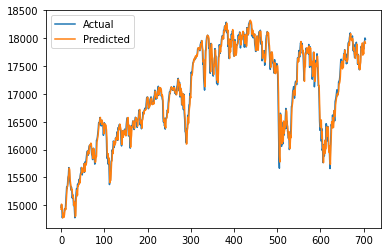

In [ ]:
print("Actual Stock Price vs Predicted Stock Price from ",Y_val.index[0]," to ",Y_val.index[-1]," on a Time Series Plot:")
data_pred[['Actual', 'Predicted']].plot()

In [ ]:
print('MSE:', round(metrics.mean_squared_error(Y_val,Y_val_pred), 2))
print("MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))
print("R^2: ",round(metrics.r2_score(Y_val,Y_val_pred),2))

MSE: 17595.33
MAE:  98.65
R^2:  0.98


In [ ]:
param_grid={
    'max_depth':[5,10,15],
    'min_samples_split':[5,10],
    'max_features':['auto','sqrt'],
    'min_samples_leaf':[3,4]
}

rf=RandomForestRegressor(n_estimators=100, n_jobs=-1)

grid_search= GridSearchCV(rf, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_scaled_train, y_train)


In [ ]:
rf_best= grid_search.best_estimator_

predictions_rf= rf_best.predict(X_scaled_test)

Stock Price Prediction Plot for the same period of time using Random Forest Regression:


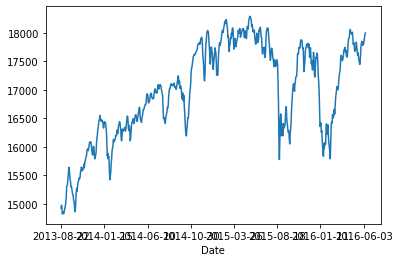

In [ ]:
print("Stock Price Prediction Plot for the same period of time using Random Forest Regression:")
X_train, X_val, X_test, X_tot, Y_train, Y_val, Y_test, Y_tot = create_train_test_set(data)
rf.fit(X_val,Y_val)
Y_pred = rf.predict(X_val)
Y_pred_series = pd.Series(Y_pred, index=Y_val.index)
Y_pred_series.plot()
plt.show()


In [ ]:
print("Using RF Regression : \n")

print("Actual and Predicted Stock Price from ",Y_val.index[0]," to ",Y_val.index[-1]," :")
data_predict = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
data_predict['Predicted'] = Y_pred
data_predict = data_predict.reset_index()
data_predict.loc[:, 'Date'] = pd.to_datetime(data_predict['Date'],format='%Y-%m-%d')
data_predict

Using RF Regression : 

Actual and Predicted Stock Price from  2013-08-22  to  2016-06-09  :


,Date,Actual,Predicted
0,2013-08-22,14963.740234,14928.228730
1,2013-08-23,15010.509766,14977.615157
2,2013-08-26,14946.459961,14934.168965
3,2013-08-27,14776.129883,14825.676856
4,2013-08-28,14824.509766,14848.851006
...,...,...,...
700,2016-06-03,17807.060547,17816.471738
701,2016-06-06,17920.330078,17875.747617
702,2016-06-07,17938.279297,17917.928340
703,2016-06-08,18005.050781,17979.251367


Actual Stock Price vs Predicted Stock Price from  2013-08-22  to  2016-06-09  on a Time Series Plot:


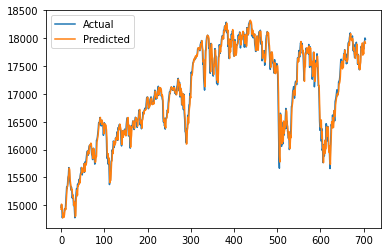

In [ ]:
print("Actual Stock Price vs Predicted Stock Price from ",Y_val.index[0]," to ",Y_val.index[-1]," on a Time Series Plot:")
data_pred[['Actual', 'Predicted']].plot()

In [ ]:
print('MSE:', round(metrics.mean_squared_error(Y_val,Y_pred), 2))
print("MAE: ",round(metrics.mean_absolute_error(Y_val,Y_pred),2))
print("R^2: ",round(metrics.r2_score(Y_val,Y_pred),2))

MSE: 2806.18
MAE:  39.38
R^2:  1.0
